<h1><b>Modeling with Clusters

<h1><b>Modeling with Clusters

<h1><b>Modeling with Clusters

<h3><b>Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

<h3><b>Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = data('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.rename(columns = {'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width', 'Petal.Length': 'petal_length', 'Petal.Width': 'petal_width'}, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

In [6]:
from wrangle import split_data
train, validate, train = split_data(df)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
73,6.3,2.5,4.9,1.5,versicolor
113,6.8,3.0,5.5,2.1,virginica
133,6.4,2.8,5.6,2.2,virginica
89,5.6,3.0,4.1,1.3,versicolor
38,4.9,3.6,1.4,0.1,setosa


<b> Modeling

In [7]:
X = train[['sepal_width', 'petal_width']]

# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1], dtype=int32)

> <b>Add Clusters to original train data:

In [8]:
# make a new column names cluster in iris and X dataframe

train['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

train.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
73,6.3,2.5,4.9,1.5,versicolor,0
113,6.8,3.0,5.5,2.1,virginica,2
133,6.4,2.8,5.6,2.2,virginica,2
89,5.6,3.0,4.1,1.3,versicolor,0
38,4.9,3.6,1.4,0.1,setosa,1


In [9]:
train.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
14,4.3,3.0,1.1,0.1,setosa,1
9,4.4,2.9,1.4,0.2,setosa,1
64,6.1,2.9,4.7,1.4,versicolor,0
117,6.5,3.0,5.5,1.8,virginica,2
73,6.3,2.5,4.9,1.5,versicolor,0
133,6.4,2.8,5.6,2.2,virginica,2
37,5.5,3.5,1.3,0.2,setosa,1
134,6.3,2.8,5.1,1.5,virginica,0
122,5.6,2.8,4.9,2.0,virginica,2
128,6.1,3.0,4.9,1.8,virginica,2


<b>Visualize Clusters

In [10]:
train.groupby('Species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
Species,,,,,
setosa,4.976923,3.415385,1.446154,0.207692,1.000000
versicolor,5.833333,2.666667,4.400000,1.350000,0.000000
virginica,6.590909,3.027273,5.454545,2.018182,1.818182


In [11]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[2.68571429, 1.37142857],
       [3.41538462, 0.20769231],
       [3.05      , 2.07      ]])

In [12]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,sepal_width,petal_width
0,2.685714,1.371429
1,3.415385,0.207692
2,3.050000,2.070000


In [13]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster')['sepal_width', 'petal_width'].mean()

,sepal_width,petal_width
cluster,,
0,2.685714,1.371429
1,3.415385,0.207692
2,3.050000,2.070000


In [14]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1], dtype=int32)

In [15]:
train['cluster'] = 'cluster_' + train.cluster.astype(str)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
73,6.3,2.5,4.9,1.5,versicolor,cluster_0
113,6.8,3.0,5.5,2.1,virginica,cluster_2
133,6.4,2.8,5.6,2.2,virginica,cluster_2
89,5.6,3.0,4.1,1.3,versicolor,cluster_0
38,4.9,3.6,1.4,0.1,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

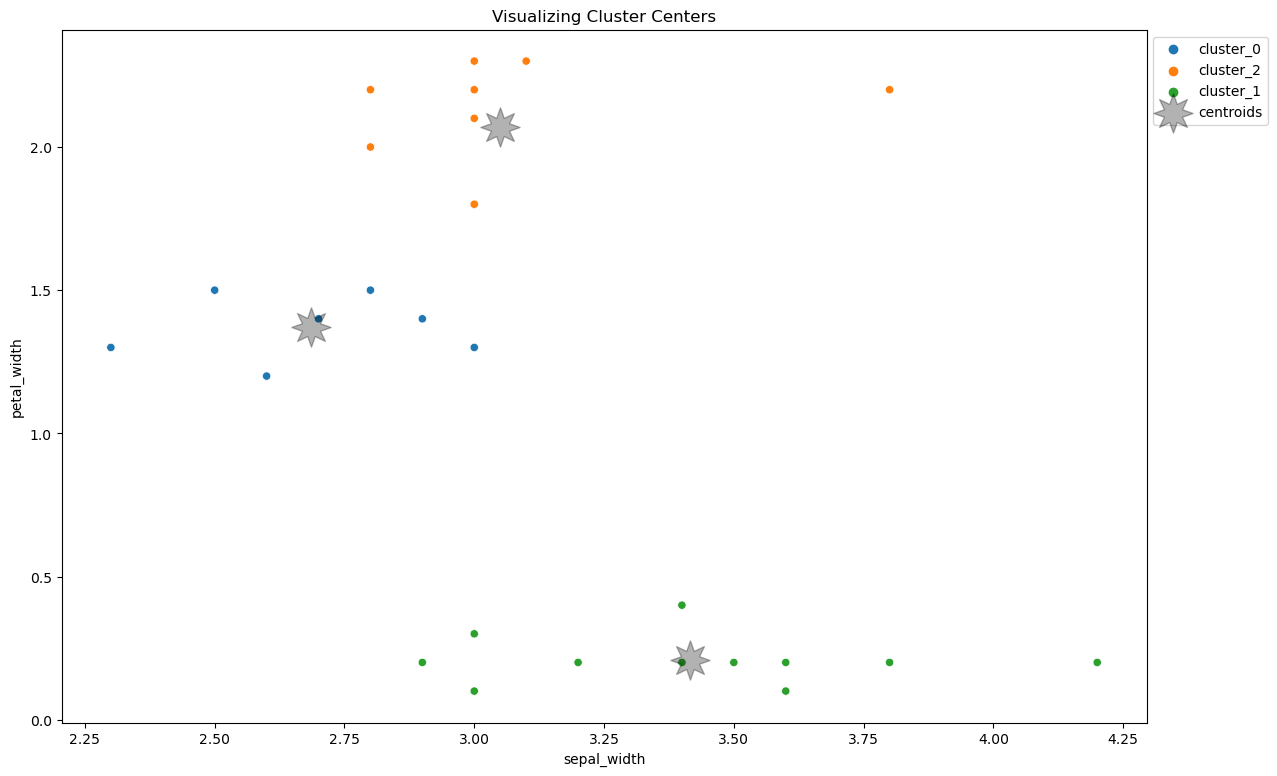

In [16]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sepal_width', y = 'petal_width', data = train, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'sepal_width', y = 'petal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<b>Elbow Method to choose K

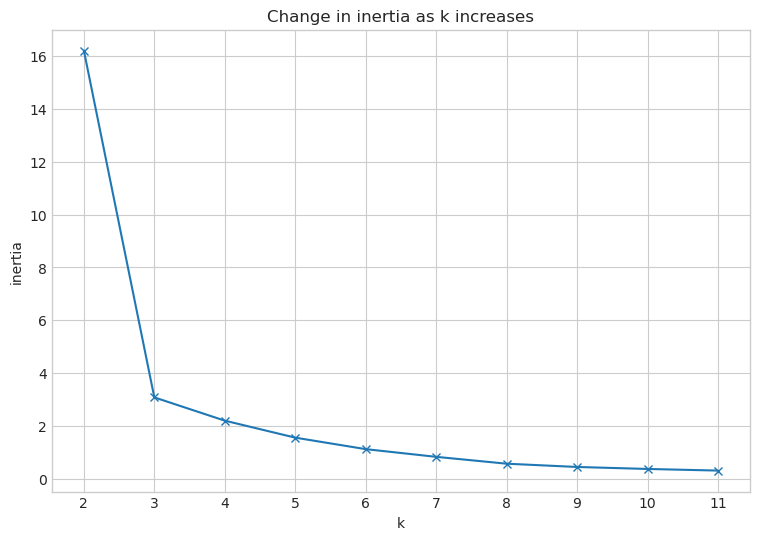

In [17]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

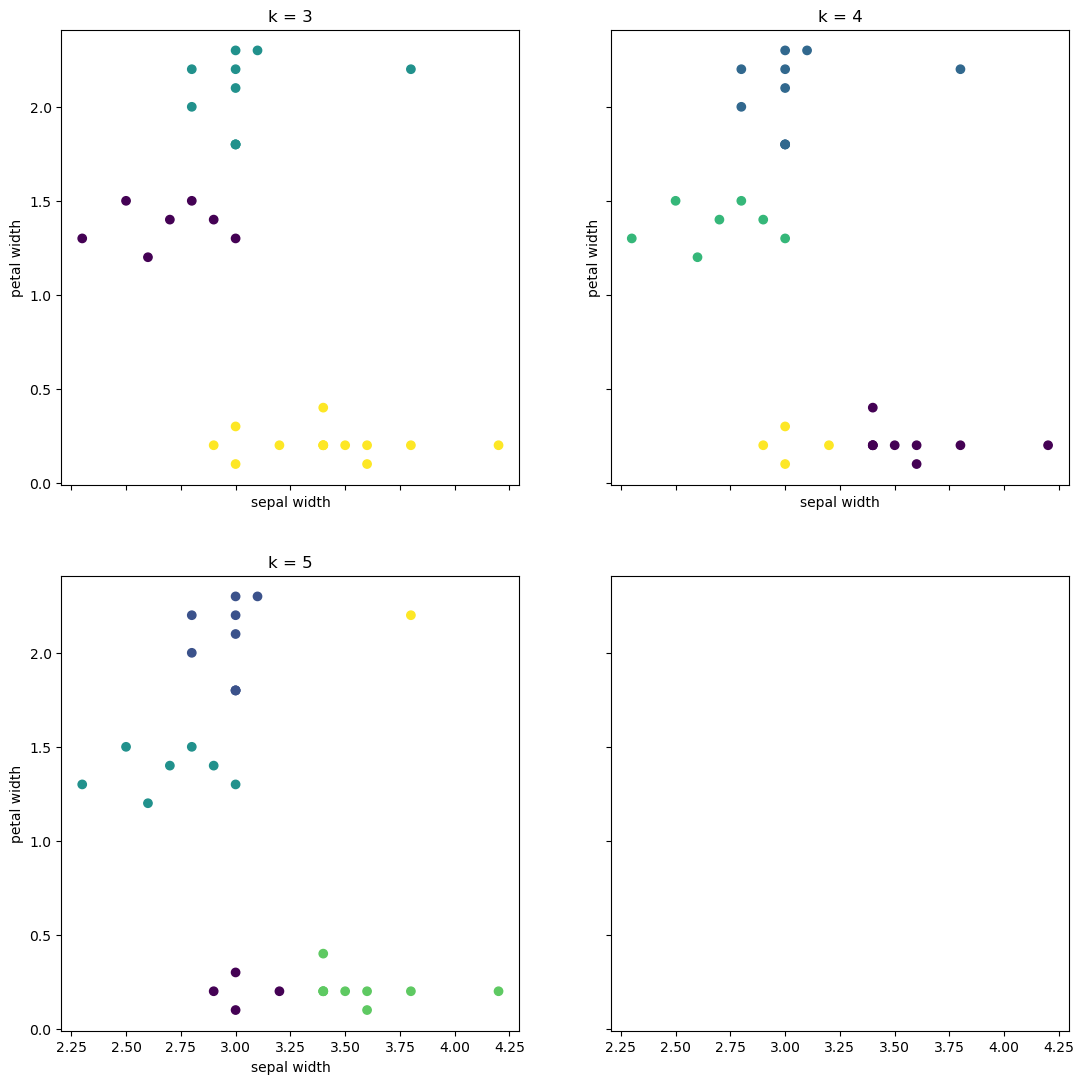

In [18]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

<h3><b>How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [19]:
df = data('iris')
df.rename(columns = {'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width', 'Petal.Length': 'petal_length', 'Petal.Width': 'petal_width'}, inplace=True)

from wrangle import split_data
train, validate, train = split_data(df)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
73,6.3,2.5,4.9,1.5,versicolor
113,6.8,3.0,5.5,2.1,virginica
133,6.4,2.8,5.6,2.2,virginica
89,5.6,3.0,4.1,1.3,versicolor
38,4.9,3.6,1.4,0.1,setosa


In [20]:
train = train.drop(columns = 'Species')
# Scale age, income, and spending score features
# make the thing
scaler = MinMaxScaler()

# fit the thing on train
scaler.fit(train)

# use the thing (scale train, validate, and test)
train_scaled = scaler.transform(train)

# If we had the validate and test sets
# validate_scaled = scaler.transform(validate) 
# test_scaled = scaler.transform(test) if we had validate

# turn the scaled arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)

# If we had the validate and test 
# validate_scaled = pd.DataFrame(train_scaled, columns=validate.columns) 
# test_scaled = pd.DataFrame(train_scaled, columns=test.columns)
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.588235,0.105263,0.678571,0.636364
113,0.735294,0.368421,0.785714,0.909091
133,0.617647,0.263158,0.803571,0.954545
89,0.382353,0.368421,0.535714,0.545455
38,0.176471,0.684211,0.053571,0.000000


<b> Modeling

In [21]:
X = train[['sepal_width', 'petal_width']]

# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

> <b>Add Clusters to original train data:

In [22]:
# make a new column names cluster in iris and X dataframe

train['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

train.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
73,6.3,2.5,4.9,1.5,1
113,6.8,3.0,5.5,2.1,2
133,6.4,2.8,5.6,2.2,2
89,5.6,3.0,4.1,1.3,1
38,4.9,3.6,1.4,0.1,0


In [23]:
train.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,cluster
117,6.5,3.0,5.5,1.8,2
21,5.4,3.4,1.7,0.2,0
25,4.8,3.4,1.9,0.2,0
5,5.0,3.6,1.4,0.2,0
9,4.4,2.9,1.4,0.2,0
133,6.4,2.8,5.6,2.2,2
139,6.0,3.0,4.8,1.8,2
105,6.5,3.0,5.8,2.2,2
60,5.2,2.7,3.9,1.4,1
128,6.1,3.0,4.9,1.8,2


<b>Visualize Clusters

In [26]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[3.41538462, 0.20769231],
       [2.68571429, 1.37142857],
       [3.05      , 2.07      ]])

In [27]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,sepal_width,petal_width
0,3.415385,0.207692
1,2.685714,1.371429
2,3.050000,2.070000


In [28]:
#  Find the mean of the original df and groupby cluster

train.groupby('cluster')['sepal_width', 'petal_width'].mean()

,sepal_width,petal_width
cluster,,
0,3.415385,0.207692
1,2.685714,1.371429
2,3.050000,2.070000


In [29]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

In [30]:
train['cluster'] = 'cluster_' + train.cluster.astype(str)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
73,6.3,2.5,4.9,1.5,cluster_1
113,6.8,3.0,5.5,2.1,cluster_2
133,6.4,2.8,5.6,2.2,cluster_2
89,5.6,3.0,4.1,1.3,cluster_1
38,4.9,3.6,1.4,0.1,cluster_0


<Figure size 1400x900 with 0 Axes>

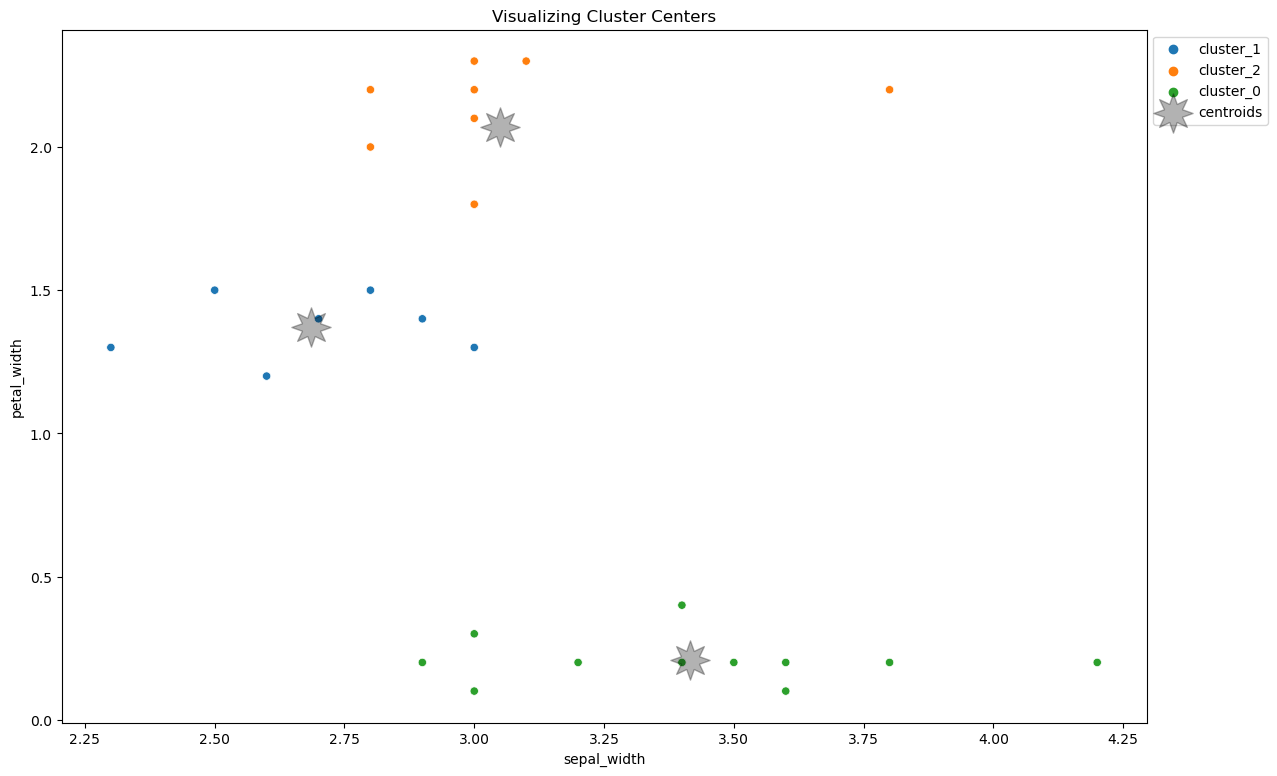

In [31]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'sepal_width', y = 'petal_width', data = train, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'sepal_width', y = 'petal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = train['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

<b>Elbow Method to choose K

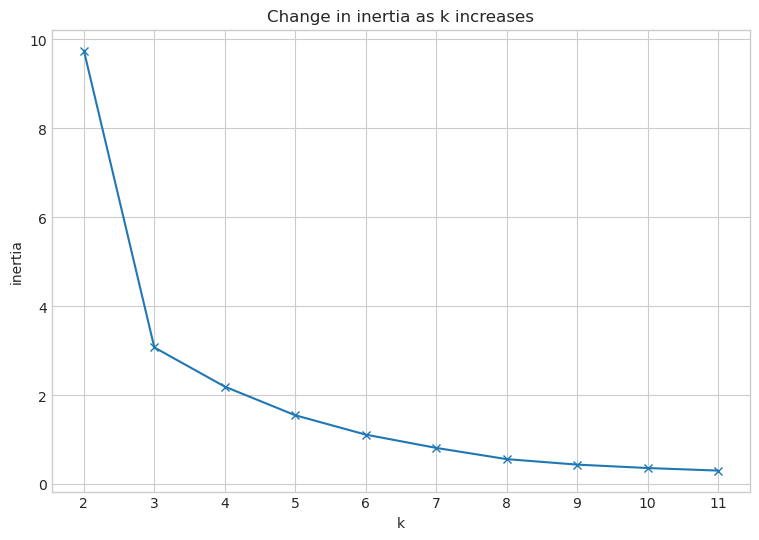

In [32]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

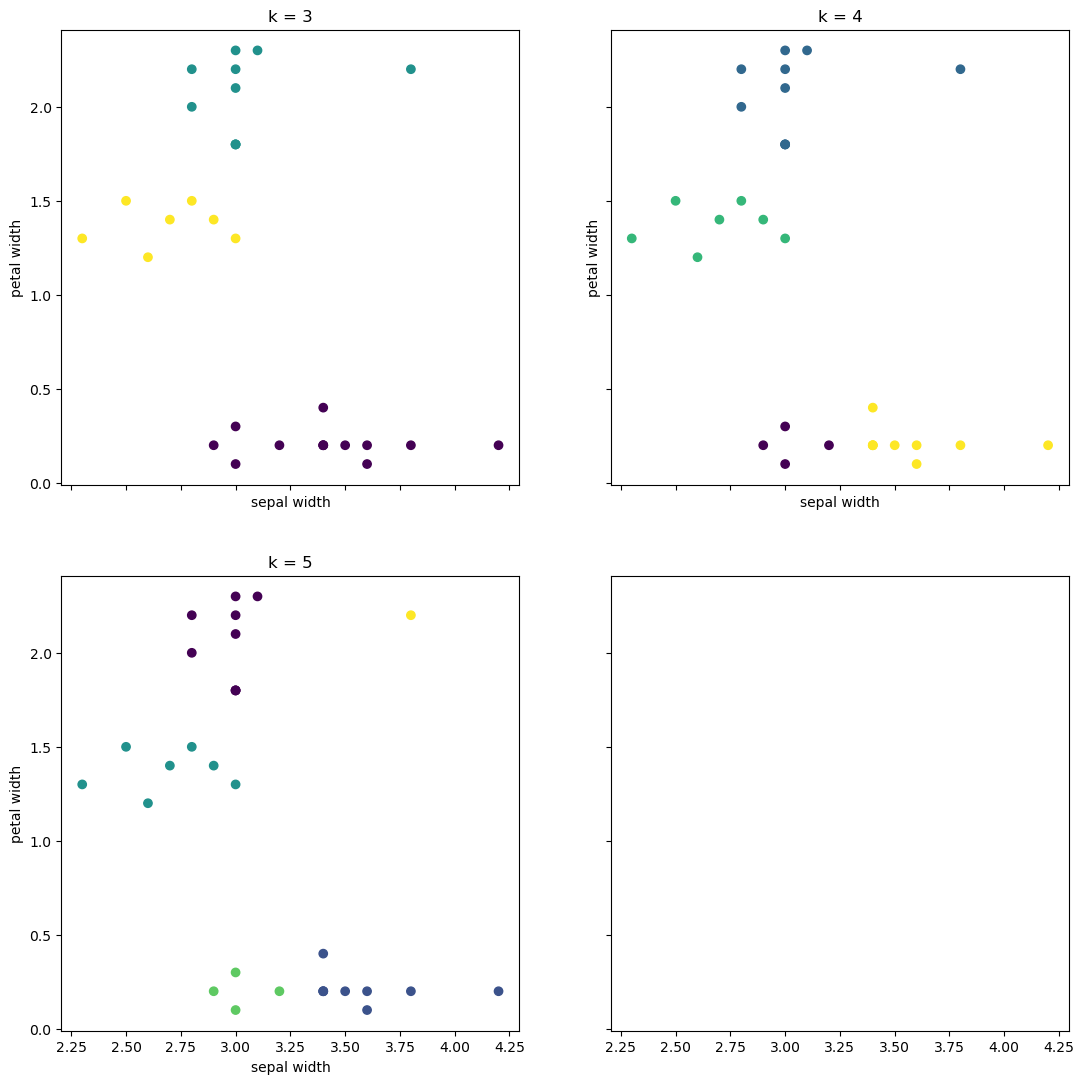

In [33]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')